# SGDClassifer

---
확률적 경사하강법을 사용한 분류모델

**손실함수**
> - 회귀 : mse <br/>
> - 분류 : (binary) cross-entropy(=Logistic loss function)

**확률적 경사하강법**

>train set을 임의로 골라 학습하며 손실함수로 구한 loss를 최소로 만드는 최적화
알고리즘<br/>
>모델의 가중치와 bias를 조정하여 loss를 줄인다.

[when]

대용량 데이터 혹은 데이터가 조금씩 추가되는 경우 **점진적 학습** 모델이 필요하다.
> - 점진적 학슴<br/>
> partial_fit() 1 epoch씩 학습한다.

[목표] : 확률적 경사 하강법을 이해하고, **최적의 epoch**를 찾는다.

(혼공 207p~215p)

### Read CSV File

In [ ]:
import pandas as pd

df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

print(X.head())
print(y.head())

   Weight  Length  Diagonal   Height   Width
0   242.0    25.4      30.0  11.5200  4.0200
1   290.0    26.3      31.2  12.4800  4.3056
2   340.0    26.5      31.1  12.3778  4.6961
3   363.0    29.0      33.5  12.7300  4.4555
4   430.0    29.0      34.0  12.4440  5.1340
0    Bream
1    Bream
2    Bream
3    Bream
4    Bream
Name: Species, dtype: object


### Train, Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(119, 5) (40, 5)
(119,) (40,)


### Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

train_scaled = ss.fit_transform(X_train)
test_scaled = ss.transform(X_test)

### 모델 학습

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
model.fit(train_scaled, y_train)

print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.773109243697479
0.775


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


과소적합

### 점진 학습
> - partial_fit() : 1 epoch씩 점진 학습

In [ ]:
model.partial_fit(train_scaled, y_train)

print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.8151260504201681
0.8


과소적합



### 최적의 epoch 찾기
epoch 횟수에 따라 과소적합이나, 과대적합이 될 수 있다.

test set 점수가 하락하기 직전 epoch를 구해보자.

In [ ]:
import numpy as np

model = SGDClassifier(loss='log_loss', random_state=42)
classes = np.unique(y_train)

train_score = []
test_score = []

for _ in range(0, 300):
  # 점진 학습
  model.partial_fit(train_scaled, y_train, classes=classes)
  train_score.append(model.score(train_scaled, y_train))
  test_score.append(model.score(test_scaled, y_test))

### Plot

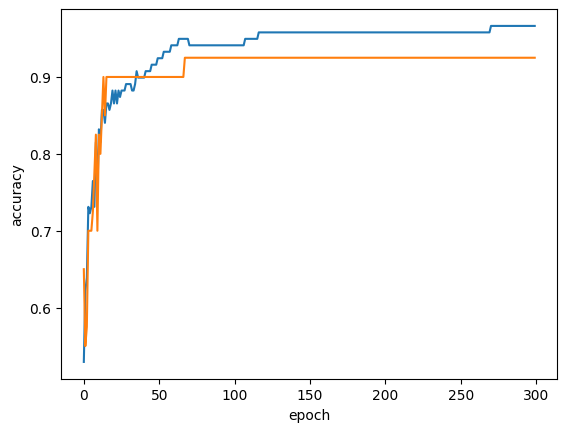

In [ ]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

epoch= 100일 때가 최적의 모델이다.

epoch=100 이후로 test score은 일정한데, train score과 차이가 벌어지고 있기 때문이다.

### 모델 성능 평가

In [ ]:
model = SGDClassifier(loss='log_loss', tol=None, max_iter=100, random_state=42)
model.fit(train_scaled, y_train)
print(model.score(train_scaled, y_train))
print(model.score(test_scaled, y_test))

0.957983193277311
0.925


### Predict

In [ ]:
print(y_test[:5])
print(model.predict(test_scaled[:5]))
prob = model.predict_proba(test_scaled[:5])
print(np.round(prob, decimals=3))
print(model.classes_)

78         Perch
155        Smelt
128         Pike
55     Whitefish
94         Perch
Name: Species, dtype: object
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.    0.003 0.773 0.    0.219 0.    0.005]
 [0.    0.001 0.015 0.    0.04  0.945 0.   ]
 [0.    0.    0.011 0.952 0.02  0.016 0.001]
 [0.    0.    0.525 0.    0.423 0.    0.052]
 [0.    0.    0.688 0.    0.306 0.    0.006]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
